# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [234]:
#!pip install scikeras[tensorflow]

In [235]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras

from keras import backend
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.metrics import BinaryAccuracy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam,SGD,RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
#import keras_tuner as kt
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# importing metrics
from sklearn import metrics
import random
#Importing classback API
#from tensorflow.keras import callbacks
#from tensorflow.keras.callbacks.EarlyStopping
%matplotlib inline

## Loading the dataset

In [236]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [237]:
#!ls drive/MyDrive/MLS-1Notebook

In [238]:
df = pd.read_csv("./drive/MyDrive/MLS-1Notebook/bank-1.csv")  # Complete the code to read the dataset
#df = pd.read_csv("bank-1.csv")  # Complete the code to read the dataset

## Data Overview

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [240]:
df.head() #rownumber is sequencial and should be removed, Exited is target variable

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [242]:
df.isnull().sum() # no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<span style="color:blue">
<h3>Unique Values by Column Name<h3>
<ul>
<li>RowNumber, CustomerId and Surname should be removed from analysis as they do not have any statistical properties related to churning</li>
<li>Data seems to be clean</li>
</ul>
</span>

In [243]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [244]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [245]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [246]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


In [247]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [248]:
for col in df.columns:
    print(f"colname: {col} -> {df[col].unique()}")

colname: RowNumber -> [    1     2     3 ...  9998  9999 10000]
colname: CustomerId -> [15634602 15647311 15619304 ... 15584532 15682355 15628319]
colname: Surname -> ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
colname: CreditScore -> [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 7

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

<span style="color:blue">
<h3>Answers<h3>
<ul>
<li>Credit Score has many outliers on the left tail, meaning there are many customers who have low credit score, mean and median is same</li>
<li>51.5% percent are active members which means almost half are not using servics in the bank, they may potentially leave as they do not see any value today</li>
<li>20.4% percent of the data is of people who have left, this is our target variable and appears to be imblanced, possibly over sampling of minory class might help</li>
<li>Age and Exited have small correlation, younger people are churning more than older people</li>
<li>IsActive and Exited has negative correlation, inactive people are churning more than active</li>
<li>Females are churning more than male</li>
<li>German's are churning the most</li>
</ul>
</span>

<span style="color:blue">
<h3>Additional Initial Observations<h3>
<ul>
<li>Tenure seems to be the same for Exited and not Exited</li>
<li>EstimatedSalary is about the same for Exited and non Exited</li>
<li>Exited Customers seems to have higher balance compare to non Exited</li>
<li>Credit Card seems to have NO effect on churning</li>
<li>Higher the NumOfProducts lower the churning, so if the customer sees value in the bank services then they stay</li>
</ul>
</span>

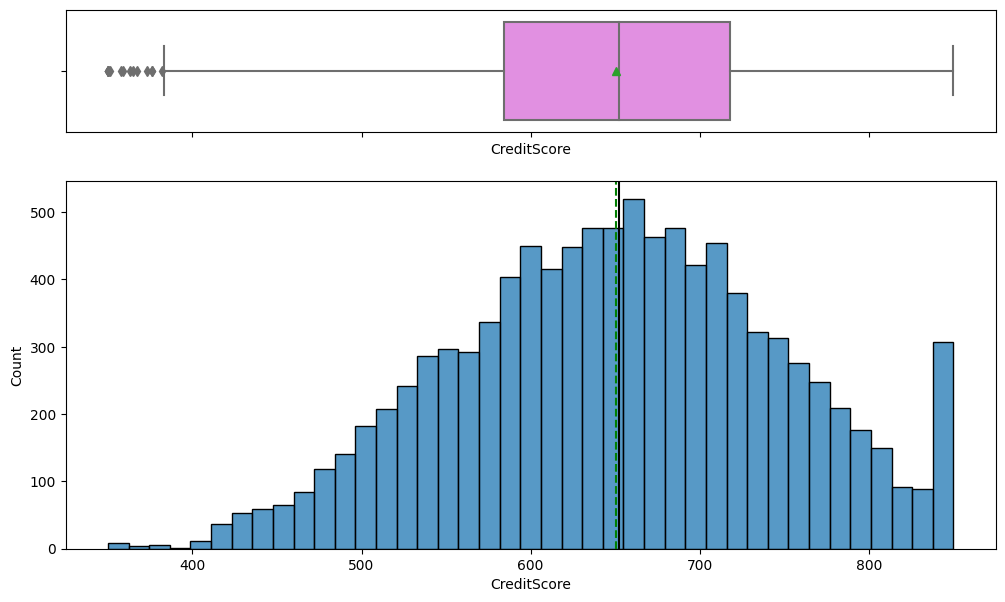

In [249]:
histogram_boxplot(df,"CreditScore")

<span style="color:blue">
<h3>Active Members<h3>
<ul>
<li>Active members tend to churn less</li>
</ul>
</span>

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


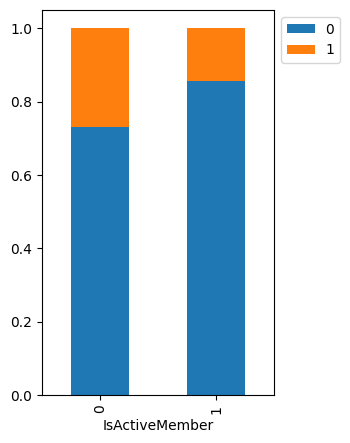

In [251]:
stacked_barplot(df,"IsActiveMember","Exited")

<span style="color:blue">
<h3>Imbalanced Data<h3>
<ul>
<li>Target class Exited has far fewer rows then not Exited</li>
</ul>
</span>

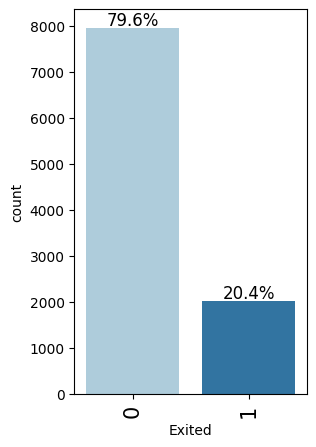

In [252]:
labeled_barplot(df, 'Exited', perc=True, n=None)

<span style="color:blue">
<h3>Tenure<h3>
<ul>
<li>Not much difference between churned and non churned customers</li>
<li>But distribution is wider, meaning higher variation in tenue in the churned class</li>
</ul>
</span>

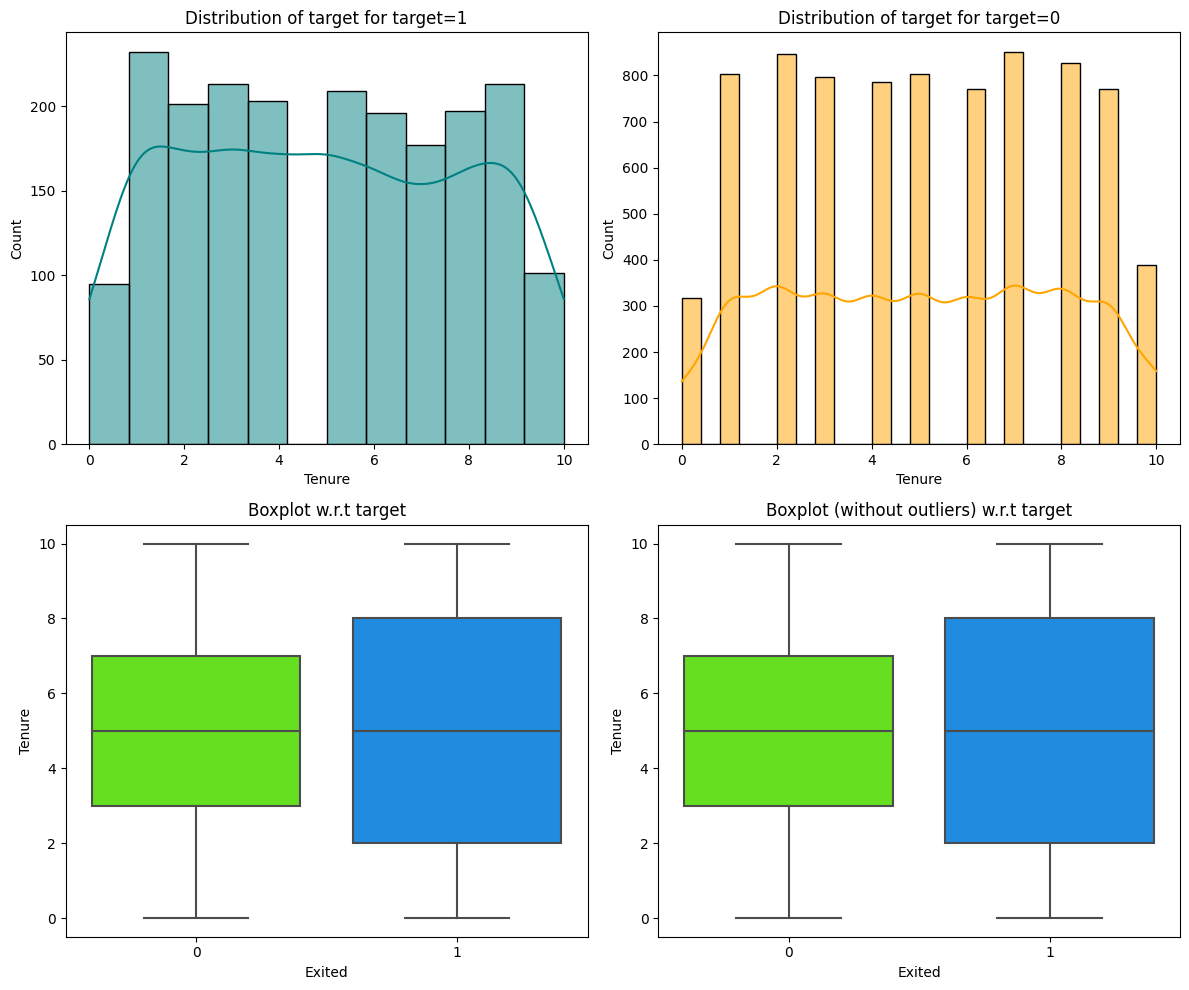

In [253]:
distribution_plot_wrt_target(df,'Tenure','Exited')

<span style="color:blue">
<h3>Estimated Salary<h3>
<ul>
<li>Not much difference between churned and non churned customers</li>
</ul>
</span>

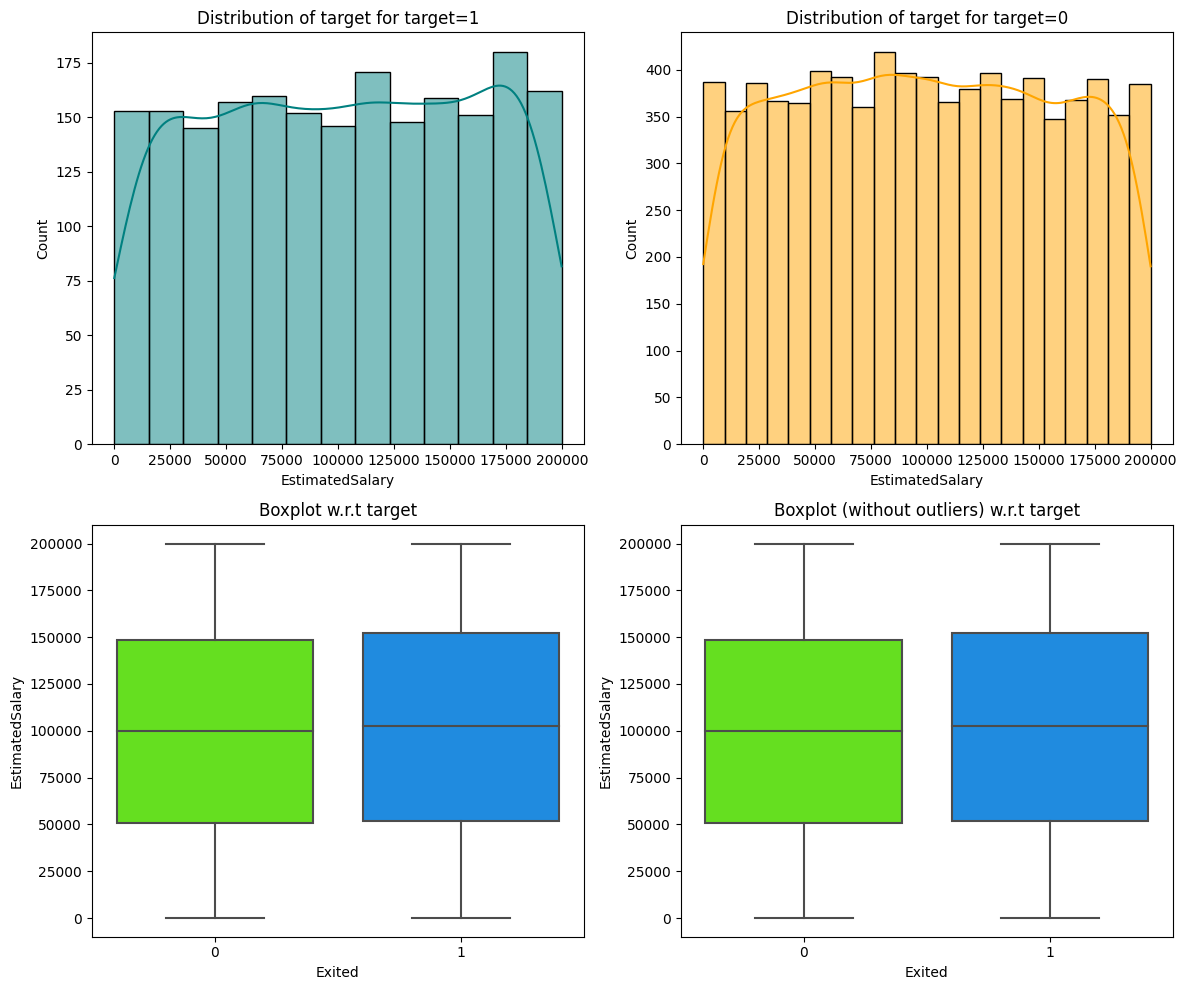

In [254]:
distribution_plot_wrt_target(df,'EstimatedSalary','Exited')

<span style="color:blue">
<h3>Balance<h3>
<ul>
<li>Churned customers have higher balance</li>
<li>Chruned customer not seeing value of their higher balance</li>
</ul>
</span>

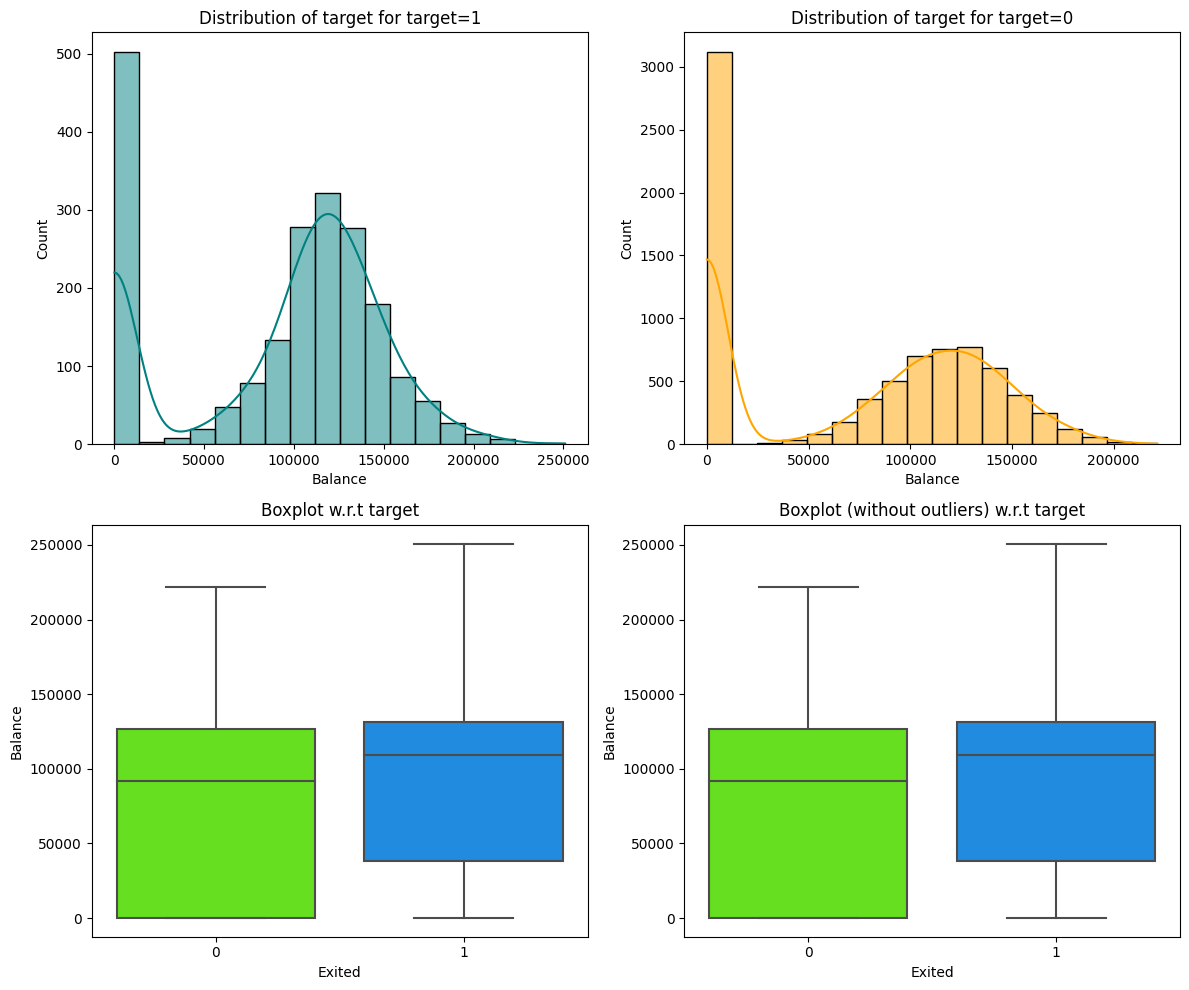

In [255]:
distribution_plot_wrt_target(df,'Balance','Exited')

<span style="color:blue">
<h3>HasCrCard<h3>
<ul>
<li>Not much difference between churned and non churned customers</li>
</ul>
</span>

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


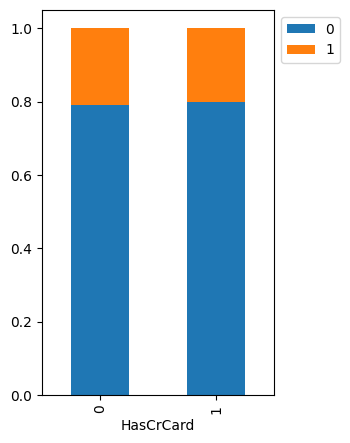

In [256]:
stacked_barplot(df,'HasCrCard','Exited')

<span style="color:blue">
<h3>Age<h3>
<ul>
<li>Younger Customers tend to churn more than older in a smoth steady decline in churning as they get older</li>
</ul>
</span>

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


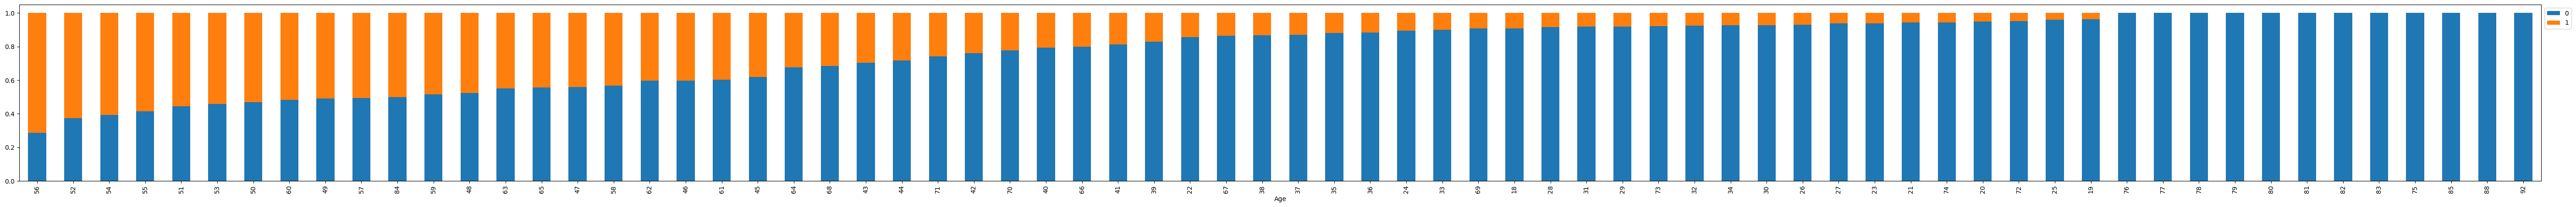

In [257]:
#  younger people have high likelyhood of Exiting
stacked_barplot(df,"Age","Exited")

<span style="color:blue">
<h3>Gender<h3>
<ul>
<li>Female Customers tend to churn more than male</li>
</ul>
</span>

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


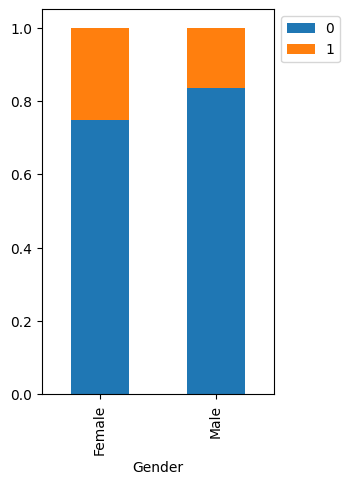

In [258]:
stacked_barplot(df,"Gender","Exited")

<span style="color:blue">
<h3>Geography<h3>
<ul>
<li>German Customers tend to churn more than any other Geography</li>
</ul>
</span>

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


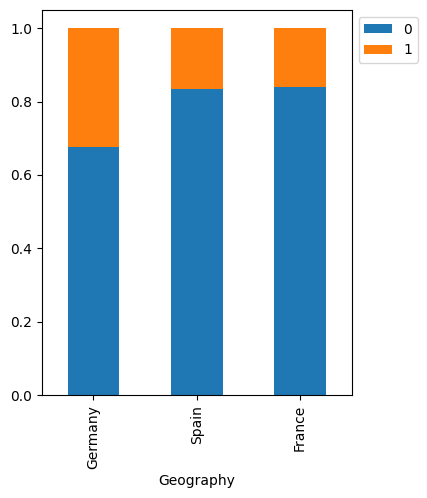

In [259]:
stacked_barplot(df,"Geography","Exited")

<span style="color:blue">
<h3>Correlation<h3>
<ul>
<li>Age has corelation with Churning, this confirms our earlier analysis</li>
<li>NumberOfProducts is inversely correlated with Churning, this means more they use services the less likely they will churn</li>
<li>Higher Balance is correlatd to Churning, this confirms our earlier analysis, perhaps the bank should suggest higher ROI for higher balance</li>
<li>In active members tend to chrun</li>
</ul>
</span>

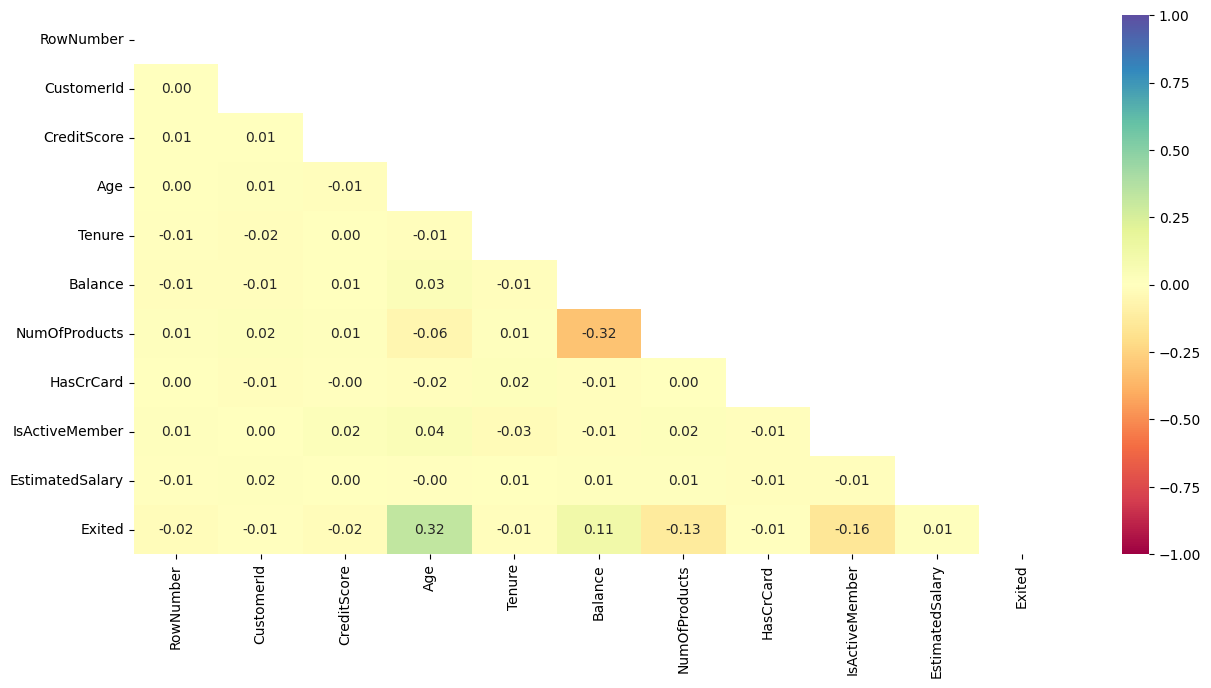

In [260]:
plt.figure(figsize=(15, 7))
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr(method='spearman')
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",mask=mask)
plt.show()

In [261]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

<span style="color:blue">
<h3>Data Processing<h3>
<ul>
<li>Removing columns</li>
<li>Checking shape after removal</li>
<li>Convert object to category variables, we will convert them to one hot/dummy variables</li>
</ul>
</span>

In [262]:
data = df.copy() # lets take a backup as a good best practice, may not be needed as the data is small we can just load it again

In [263]:
df.shape

(10000, 14)

In [264]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [265]:
df.shape

(10000, 11)

In [266]:
df.describe(include=["object"]).T #show only object

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [267]:
for col in df.select_dtypes(include=['object']).columns: # find all columns that are object and convert them to category
    df[col] = df[col].astype("category")

In [268]:
df.info() # check if variables are converted to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


<span style="color:blue">
<h3>Get Data ready for modeling<h3>
<ul>
<li>Separate data and Target Variable</li>
<li>Split data into temp and test</li>
<li>Split temp into train and validataion (val)</li>
<li>Convert Categories to one hot encoded/dummy values, note we do this after split to avoid data leakage</li>
<li>Normalized data Using standard scaler for these columns: "CreditScore","Age","Tenure","Balance","EstimatedSalary"</li>
</ul>
</span>

In [269]:
X = df.drop(["Exited"], axis=1) # get Input data for model
y = df["Exited"] # get target variable

In [270]:
X.shape,y.shape #check shape after drop

((10000, 10), (10000,))

In [271]:
# split data into temp and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [272]:
# We are doing dummies after split
# we should check if this has not caused issues in test and train having different columns
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [273]:
assert X_train.shape[1] == X_val.shape[1] == X_test.shape[1] # check if columns are same if not then alignment is required

In [274]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [275]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
col_to_scale = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
fitter_scaler = sc.fit(X_train[col_to_scale])
X_train[col_to_scale] = fitter_scaler.transform(X_train[col_to_scale])
X_val[col_to_scale] = fitter_scaler.transform(X_val[col_to_scale])
X_test[col_to_scale] = fitter_scaler.transform(X_test[col_to_scale])

<span style="color:blue">
<h3>Get Data ready for modeling<h3>
<ul>
<li>Convert pandas to Tensorflow tensors</li>
</ul>


In [276]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

In [277]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [278]:
X_train = tf.convert_to_tensor(X_train.astype('float32'))
y_train = tf.convert_to_tensor(y_train.astype('float32'))
X_val = tf.convert_to_tensor(X_val.astype('float32'))
y_val = tf.convert_to_tensor(y_val.astype('float32'))
X_test = tf.convert_to_tensor(X_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('float32'))

## Model Building

In [279]:
epochs = 50 # lets consistently use same epochs
threshold = 0.5

In [280]:
def clear_session():
    """
    clear keras backend
    """
    print("Clearing Backend Session")
    keras.backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

def display_history(title,history):
    """
    Display plot for loss and val_loss
    """
    hist  = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(("train" , "valid") , loc =0)



In [281]:
"""
display METRICS
"""
METRICS = [
        keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
        keras.metrics.MeanSquaredError(name='MSE'),
        keras.metrics.TruePositives(name='TP',thresholds=threshold),
        keras.metrics.TrueNegatives(name='TN',thresholds=threshold),
        keras.metrics.FalsePositives(name='FP',thresholds=threshold),
        keras.metrics.FalseNegatives(name='FN',thresholds=threshold),
        keras.metrics.BinaryAccuracy(name='accuracy',threshold=threshold),
        keras.metrics.Precision(name='precision',thresholds=threshold),
        keras.metrics.Recall(name='recall',thresholds=threshold),
        keras.metrics.AUC(name='auc'),
        keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]


def plot_roc(name, labels, predictions, **kwargs):
    """
    plot roc curve
    """
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')


def create_model(model_name="Model_Name",
                 optimizer_name="Adam",
                 units=64,
                 add_drop_out=False,
                 dropout_rate=.25,
                 batch_norm=False,
                 number_of_hidden_layer=2,
                 learning_rate=0.001,
                 l2_rate=0.01):
    """
    Main workhorse function to create a model, it has various options we will need

   :param str model_name: model name for tracking purpose
   :param str optimizer_name: name of the optimizer Adam or SCD or RMSProp
   :param str add_drop_out: if True then dropout layer is added
   :param float dropout_rate: Drop out rate 0.25 means 25% will be dropped out
   :param bool batch_norm: if True then batch norm layer will be added
   :param int number_of_hidden_layer: Number of hidden layer
   :param float learning_rate: learning rate
   :return: Keras Model

    """

    print(f"optimizer_name: {optimizer_name}")
    print(f"units: {units}")
    print(f"add_drop_out: {add_drop_out}")
    print(f"dropout_rate: {dropout_rate}")
    print(f"batch_norm: {batch_norm}")
    print(f"number_of_hidden_layer: {number_of_hidden_layer}")
    print(f"learning_rate: {learning_rate}")
    print(f"l2_rate: {l2_rate}")

    if optimizer_name.upper() not in ["ADAM","SGD","RMSPROP"]:
        raise ValueError(f"Invalid Optimizer name given : {optimizer_name.upper()}")

    if number_of_hidden_layer < 1:
        raise ValueError(f"number_of_hidden_layer cannot be less than 1 given: {number_of_hidden_layer}")

    # create a sequential model in keras
    model = keras.Sequential(name=model_name)
    # input layer input dim is 11
    model.add(Dense(units,activation = 'relu',input_dim = 11, name=f'Input'))

    # add dropout layer if selected
    if add_drop_out is True:
        model.add(Dropout(dropout_rate))

    # add hidden layers in this order BatchNorm, Dense with Relu, Dropout
    for i in range(number_of_hidden_layer):
        if batch_norm is True:
            model.add(BatchNormalization())
        model.add(Dense(units, activation='relu', kernel_initializer="he_uniform", name=f'HiddenDense{i}',kernel_regularizer=l2(l2_rate)))


        if add_drop_out is True:
            model.add(Dropout(dropout_rate))

    # add final last output layer with sigmoid activation
    # sigmoid should give you a probability as the output a threshold may be requried to define the class Exited or not Exited
    model.add(Dense(1, activation = 'sigmoid',name=f'OutputSigmoid'))

    if optimizer_name.upper() == "ADAM":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.upper() =="SGD":
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name.upper() =="RMSPROP":
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Invalid Optimizer name given: {optimizer_name.upper()}")


    # compile the model using BrinaryCrossEntropy Loss, as our pridiction is 1 or 0, from logits (sigmoid)
    # use all METRICS defined
    model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=METRICS)

    return model

def model_fit(model,
              X_train,
              y_train,
              X_val,
              y_val,
              model_name="No Name Model",
              early_stoping=False,
              monitor="val_loss",
              batch_size=10,
              min_delta=0.001,
              patience=5,
              epochs=epochs):
    """
    Fit the keras model
    :param str model_name: model name for tracking
    :param Keras model model: compiled keras model
    :param Tensor flow tensor X_train: training features
    :param Tensor flow tensor y_train: training target
    :param Tensor flow tensor X_val: validation features
    :param Tensor flow tensor y_val: validation target
    :param bool early_stoping: if True then early_stoping will be enabled
    :param str monitor : metric to monitor, we will go with validation loss as default
    :param int batch_size: size of batch
    :param float min_delta: minimum delta i.e difference
    :param int patience:
    :param int epochs: number of epocs fro training
    :return: Keras Model

    """
    model.summary()
    if early_stoping is True:
        print("Early Stoping")
        early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5, restore_best_weights=True)
        model_checkpoint = keras.callbacks.ModelCheckpoint(model_name + ".h5", save_best_only=True)
        history = model.fit(X_train,
                            y_train,
                            validation_data=(X_val,y_val),
                            epochs=epochs,
                            batch_size=batch_size,
                            callbacks=[early_stopping,model_checkpoint],
                            verbose=0) # remove clutter verbose = 0
        best_model = keras.models.load_model(model_name + ".h5")
        return best_model,history
    else:
        print("No Early Stoping")
        history = model.fit(X_train,
                            y_train,
                            validation_data=(X_val,y_val),
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=0)  # remove clutter verbose = 0
        return model,history


def display_confusion_matrix_and_roc(model,X,y,threshold=0.5):
    y_pred=model.predict(X)
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    best_threshold = thresholds[ np.argmax(tpr - fpr)]
    print(f"**** Optimal Threshold: {best_threshold} given {threshold}")

    y_pred = (y_pred > best_threshold) # since our output is a probability we will use a threshold of default 0.50 to say exited

    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model.name}: Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

    cm2=confusion_matrix(y_val, y_pred)
    labels = ['True Negative','False Positive','False Negative','True Positive']
    categories = [ 'Not_Exited','Exited']
    print(f"cm2 {cm2}")
    make_confusion_matrix(cm2,
                          group_names=labels,
                          categories=categories,
                          cmap='Blues',
                          title=model.name)

def model_eval(model,X,y):
    metrics = model.evaluate(X, y)
    print(f"model.evalulate {len(metrics)} {metrics}")
    display_confusion_matrix_and_roc(model,X,y)
    metrics_col = ["loss"] + [x.name for x in METRICS]
    print(f"metrics_col {len(metrics_col)}: {metrics_col}")
    metrics_values = np.array(metrics).T
    print(f"len(metrics_values): {len(metrics_values)}")
    data_dict = dict(zip(metrics_col, metrics_values))
    data_dict["Model_Name"] = model.name
    print(f"model_eval after zip{data_dict}")
    return data_dict

### Model Evaluation Criterion

In [282]:
# store details of every model tried so that we can report them in a tabular format
all_model_metrics = []

Clearing Backend Session
optimizer_name: SGD
units: 64
add_drop_out: False
dropout_rate: 0
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.0
Model: "SCG_Vanila"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                768       
                                                                 
 HiddenDense0 (Dense)        (None, 64)                4160      
                                                                 
 HiddenDense1 (Dense)        (None, 64)                4160      
                                                                 
 HiddenDense2 (Dense)        (None, 64)                4160      
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 65        
                                                                 
Total params: 13,31

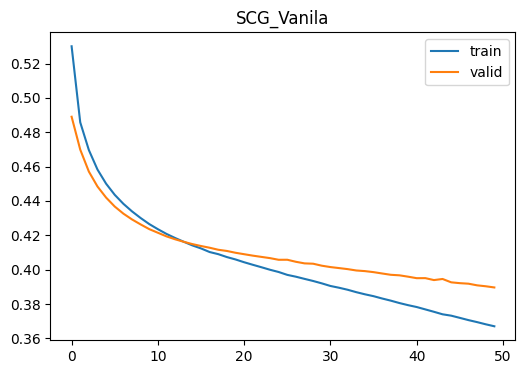

In [283]:
clear_session()
# SCG,no dropout, no early stopping, no batch norm, no l2
model_name = "SCG_Vanila"
add_drop_out = False # vanila model so no dropout
dropout_rate = 0
early_stoping = False # no early stopping
batch_norm = False # no batch norm
number_of_hidden_layer = 3
units = 64
learning_rate = 0.001
l2_rate = 0.0


model = create_model(model_name=model_name,
                        optimizer_name="SGD",
                        units=units,
                        add_drop_out=add_drop_out,
                        dropout_rate=dropout_rate,
                        batch_norm=batch_norm,
                        learning_rate=learning_rate,
                        l2_rate=l2_rate,
                        number_of_hidden_layer=number_of_hidden_layer)


scg_model,scg_history = model_fit(model,
                                  X_train,
                                  y_train,
                                  X_val,
                                  y_val,
                                  model_name=model_name,
                                  early_stoping=early_stoping,
                                  monitor="val_loss",
                                  min_delta=0.001,
                                  patience=5,
                                  epochs=epochs)
display_history(model_name,scg_history)




63/63 [==============================] - 0s 2ms/step - loss: 0.3783 - cross entropy: 0.3783 - MSE: 0.1164 - TP: 144.0000 - TN: 1542.0000 - FP: 51.0000 - FN: 263.0000 - accuracy: 0.8430 - precision: 0.7385 - recall: 0.3538 - auc: 0.8243 - prc: 0.6243
model.evalulate 12 [0.37830400466918945, 0.37830400466918945, 0.11636309325695038, 144.0, 1542.0, 51.0, 263.0, 0.8429999947547913, 0.7384615540504456, 0.35380834341049194, 0.8242819309234619, 0.6243393421173096]
63/63 [==============================] - 0s 1ms/step
**** Optimal Threshold: 0.24517393112182617 given 0.5


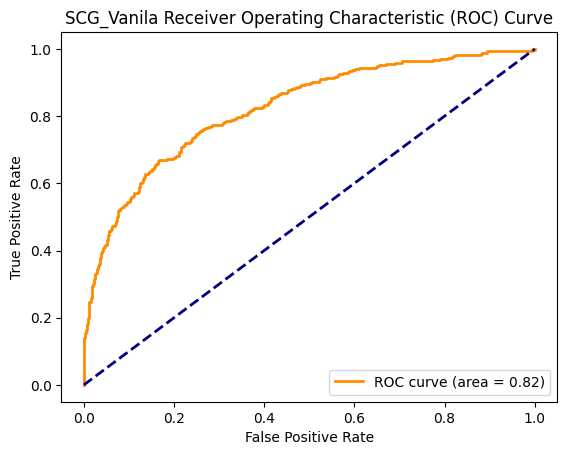

cm2 [[1160  432]
 [ 302  106]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.37830400466918945, 'cross entropy': 0.37830400466918945, 'MSE': 0.11636309325695038, 'TP': 144.0, 'TN': 1542.0, 'FP': 51.0, 'FN': 263.0, 'accuracy': 0.8429999947547913, 'precision': 0.7384615540504456, 'recall': 0.35380834341049194, 'auc': 0.8242819309234619, 'prc': 0.6243393421173096, 'Model_Name': 'SCG_Vanila'}


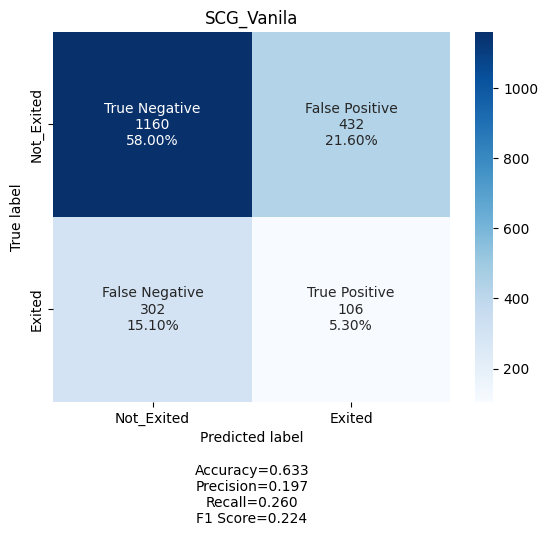

In [285]:
metrics = model_eval(scg_model,X_test,y_test)
all_model_metrics.append(metrics)

### Model Building: Neural Network model with Adam Optimizer

In [286]:
clear_session()
# same hp as SCG but with ADAM optimizer
model_name = "Adam_Vanila" # same as SGD but using ADAM
add_drop_out = False # vanila model so no dropout
dropout_rate = 0
early_stoping = False # no early stopping
batch_norm = False # no batch norm
number_of_hidden_layer = 3
units = 64
learning_rate = 0.001
l2_rate = 0.0
model = create_model(model_name=model_name,
                    optimizer_name="ADAM",
                    units=units,
                    add_drop_out=add_drop_out,
                    dropout_rate=dropout_rate,
                    batch_norm=batch_norm,
                    learning_rate=learning_rate,
                    l2_rate=l2_rate,
                    number_of_hidden_layer=number_of_hidden_layer)



adam_model,adam_history = model_fit(model,
                                    X_train,
                                    y_train,
                                    X_val,
                                    y_val,
                                    model_name=model_name,
                                    early_stoping=early_stoping,
                                    monitor="val_loss",
                                    min_delta=0.001,
                                    patience=5,
                                    epochs=epochs)


Clearing Backend Session
optimizer_name: ADAM
units: 64
add_drop_out: False
dropout_rate: 0
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.0
Model: "Adam_Vanila"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                768       
                                                                 
 HiddenDense0 (Dense)        (None, 64)                4160      
                                                                 
 HiddenDense1 (Dense)        (None, 64)                4160      
                                                                 
 HiddenDense2 (Dense)        (None, 64)                4160      
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 65        
                                                                 
Total params: 13,

<span style="color:red">
<h3>ADAM Vanila is under fitting<h3>
<li>Model complexity should be increased</li>
</ul>
</span>

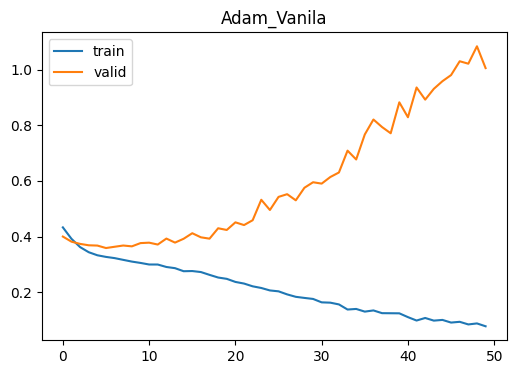

In [287]:
display_history(model_name,adam_history)

63/63 [==============================] - 1s 3ms/step - loss: 0.8936 - cross entropy: 0.8936 - MSE: 0.1581 - TP: 173.0000 - TN: 1454.0000 - FP: 139.0000 - FN: 234.0000 - accuracy: 0.8135 - precision: 0.5545 - recall: 0.4251 - auc: 0.7545 - prc: 0.5467
model.evalulate 12 [0.8935690522193909, 0.8935690522193909, 0.15813806653022766, 173.0, 1454.0, 139.0, 234.0, 0.8134999871253967, 0.5544871687889099, 0.42506143450737, 0.7544810175895691, 0.5467230081558228]
63/63 [==============================] - 0s 2ms/step
**** Optimal Threshold: 0.0507696233689785 given 0.5


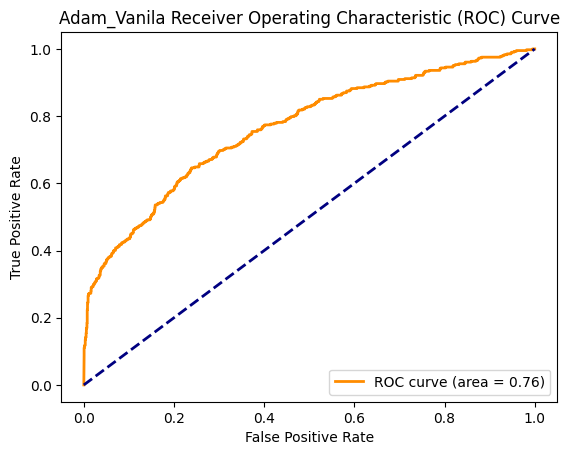

cm2 [[1074  518]
 [ 283  125]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.8935690522193909, 'cross entropy': 0.8935690522193909, 'MSE': 0.15813806653022766, 'TP': 173.0, 'TN': 1454.0, 'FP': 139.0, 'FN': 234.0, 'accuracy': 0.8134999871253967, 'precision': 0.5544871687889099, 'recall': 0.42506143450737, 'auc': 0.7544810175895691, 'prc': 0.5467230081558228, 'Model_Name': 'Adam_Vanila'}


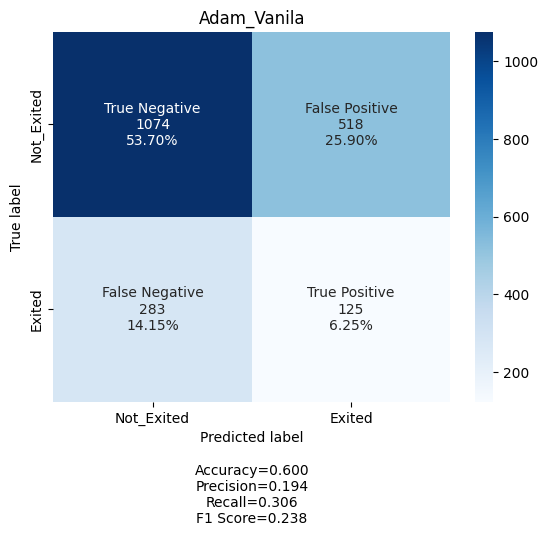

In [288]:
metrics = model_eval(adam_model,X_test,y_test)
all_model_metrics.append(metrics)

### Model Improvement: Neural Network model with Dropout

In [289]:
clear_session()
model_name="Adam_WithDropOut"
add_drop_out = True # vanila model so no dropout
dropout_rate = 0.25
early_stoping = False # no early stopping
batch_norm = False # no batch norm
number_of_hidden_layer = 3
units = 64
learning_rate = 0.001
l2_rate = 0.0


model = create_model(model_name=model_name,
                        optimizer_name="ADAM",
                        units=units,
                        add_drop_out=add_drop_out,
                        dropout_rate=dropout_rate,
                        batch_norm=batch_norm,
                        learning_rate=learning_rate,
                        l2_rate=l2_rate,
                        number_of_hidden_layer=number_of_hidden_layer)

adam_dropout_model,adam_dropout_history = model_fit(model,
                                                    X_train,
                                                    y_train,
                                                    X_val,
                                                    y_val,
                                                    model_name=model_name,
                                                    early_stoping=early_stoping,
                                                    monitor="val_loss",
                                                    min_delta=0.001,
                                                    patience=5,
                                                    epochs=epochs)


Clearing Backend Session
optimizer_name: ADAM
units: 64
add_drop_out: True
dropout_rate: 0.25
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.0
Model: "Adam_WithDropOut"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 HiddenDense0 (Dense)        (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 HiddenDense1 (Dense)        (None, 64)                4160      
                                                                 
 dropout_2

<span style="color:red">
<h3>ADAM with drop out seems to performing ok<h3>
</ul>
</span>

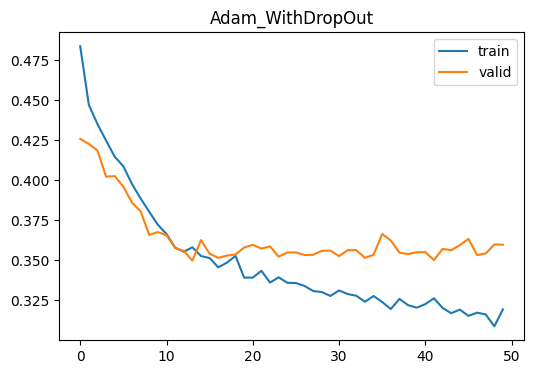

In [290]:
display_history(model_name,adam_dropout_history)

63/63 [==============================] - 1s 3ms/step - loss: 0.3597 - cross entropy: 0.3597 - MSE: 0.1096 - TP: 201.0000 - TN: 1495.0000 - FP: 98.0000 - FN: 206.0000 - accuracy: 0.8480 - precision: 0.6722 - recall: 0.4939 - auc: 0.8419 - prc: 0.6710
model.evalulate 12 [0.35974687337875366, 0.35974687337875366, 0.10962656140327454, 201.0, 1495.0, 98.0, 206.0, 0.8479999899864197, 0.6722407937049866, 0.4938575029373169, 0.8419428467750549, 0.6710165143013]
63/63 [==============================] - 0s 2ms/step
**** Optimal Threshold: 0.22019129991531372 given 0.5


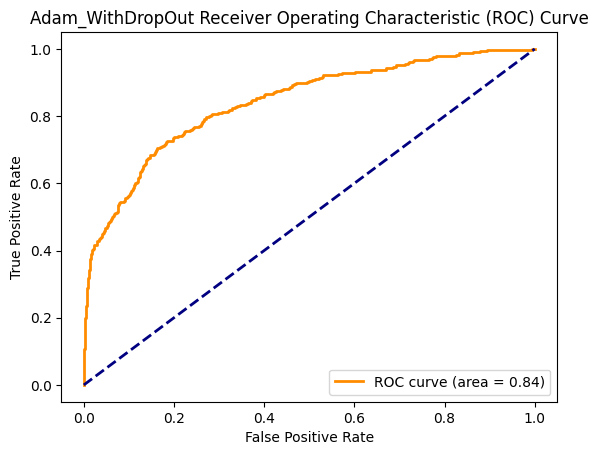

cm2 [[1122  470]
 [ 288  120]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.35974687337875366, 'cross entropy': 0.35974687337875366, 'MSE': 0.10962656140327454, 'TP': 201.0, 'TN': 1495.0, 'FP': 98.0, 'FN': 206.0, 'accuracy': 0.8479999899864197, 'precision': 0.6722407937049866, 'recall': 0.4938575029373169, 'auc': 0.8419428467750549, 'prc': 0.6710165143013, 'Model_Name': 'Adam_WithDropOut'}


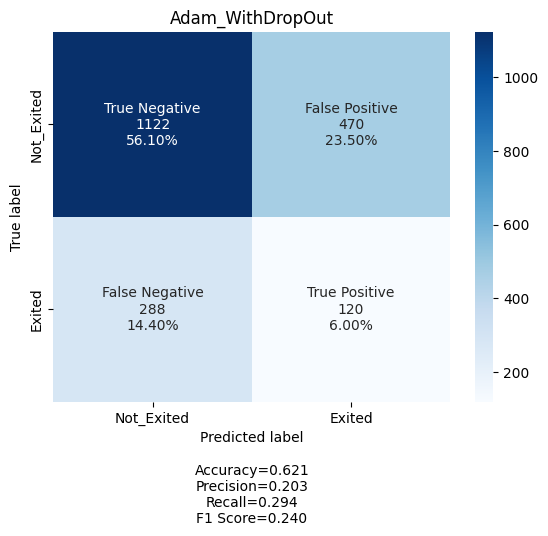

In [291]:
metrics = model_eval(adam_dropout_model,X_test,y_test)
all_model_metrics.append(metrics)

### Model Improvement: Neural Network model with Hyperparameter tuning

In [292]:
early_stoping = True # early stopping for hp tunning, it made no difference in accuracy score, so for performance reason early stopping is choosen
def hp_tunning(X_val,y_val):
    """
    Hyper parameter tunning on validation set
    """
    param_random = {
        'optimizer_name' : ['Adam'], # We will use only one optimizer
        'units': [32, 64, 128,192,256],
        'learning_rate': [0.001, 0.0001],
        'l2_rate': [0.01, 0.001],
        'number_of_hidden_layer':[3,4,5,10],
        'dropout_rate': [0.10,0.25,0.30],
        'batch_norm': [True, False],
        'add_drop_out': [True, False]
    }





    # reduce clutter verbose = 0
    model = KerasClassifier(build_fn=create_model,verbose=0)
    randomCv = RandomizedSearchCV(estimator=model, param_distributions=param_random,cv=3)
    # reduce clutter verbose = 0
    random_result = randomCv.fit(X_val, y_val,verbose=0)
    return random_result
random_hp_val_result = hp_tunning(X_val.numpy(), y_val.numpy())

optimizer_name: Adam
units: 64
add_drop_out: False
dropout_rate: 0.25
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.01
optimizer_name: Adam
units: 64
add_drop_out: False
dropout_rate: 0.25
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.01
optimizer_name: Adam
units: 64
add_drop_out: False
dropout_rate: 0.25
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.01
optimizer_name: Adam
units: 128
add_drop_out: True
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.001
optimizer_name: Adam
units: 128
add_drop_out: True
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.001
optimizer_name: Adam
units: 128
add_drop_out: True
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 10
learning_rate: 0.0001
l2_rate: 0.001
optimizer_name: Adam
units: 32
add_drop_out: True
dropout_rate: 0.25
batch_norm: False
number_

<span style="color:red">
<h3>Best Tuned Model<h3>
<ul>
<li>Mean Test Score</li>
<li>Standard Test Score</li>
</ul>
</span>

In [293]:
print("Best Tunned Model results:")
means = random_hp_val_result.cv_results_['mean_test_score']
stds = random_hp_val_result.cv_results_['std_test_score']
print("Best: %f using %s " % (random_hp_val_result.best_score_, random_hp_val_result.best_params_))

Best Tunned Model results:
Best: 0.799001 using {'units': 192, 'optimizer_name': 'Adam', 'number_of_hidden_layer': 3, 'learning_rate': 0.001, 'l2_rate': 0.001, 'dropout_rate': 0.3, 'batch_norm': False, 'add_drop_out': False} 


In [294]:
def create_and_fit_best_model(model_name,random_result,X_train, y_train,X_val,y_val,X_test,y_test):

    #random_result = hp_tunning(X_val, y_val) # these need to be numpy as we are not using tensorflow for running
    # Summarize results

    params = random_result.cv_results_['params']
    clear_session()


    model = create_model(model_name=model_name,
                         optimizer_name=random_result.best_params_['optimizer_name'],
                         units=random_result.best_params_['units'],
                         add_drop_out=random_result.best_params_['add_drop_out'],
                         dropout_rate=random_result.best_params_['dropout_rate'],
                         batch_norm=random_result.best_params_['batch_norm'],
                         learning_rate=random_result.best_params_['learning_rate'],
                         l2_rate=random_result.best_params_['l2_rate'],
                         number_of_hidden_layer=random_result.best_params_['number_of_hidden_layer'])



    best_model,best_history = model_fit(model,
                                        X_train,
                                        y_train,
                                        X_val,
                                        y_val,
                                        model_name=model_name,
                                        early_stoping=early_stoping,
                                        monitor="val_loss",
                                        min_delta=0.001,
                                        patience=5,epochs=epochs)

    display_history(model_name,best_history)

    metrics = model_eval(best_model,X_test,y_test)
    metrics["Model_Name"] = model_name
    all_model_metrics.append(metrics)
    return metrics



Clearing Backend Session
optimizer_name: Adam
units: 192
add_drop_out: False
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.001
Model: "Test_Best_Model_Tuned"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 192)               2304      
                                                                 
 HiddenDense0 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense1 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense2 (Dense)        (None, 192)               37056     
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 193       
                                                                 
To

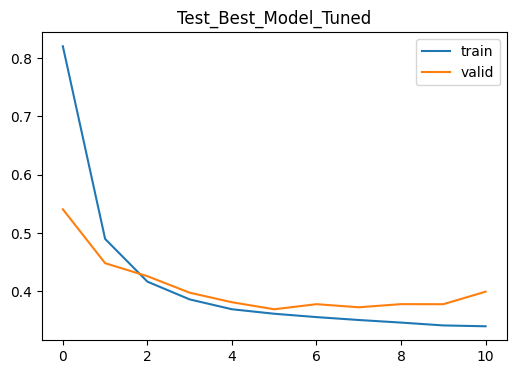

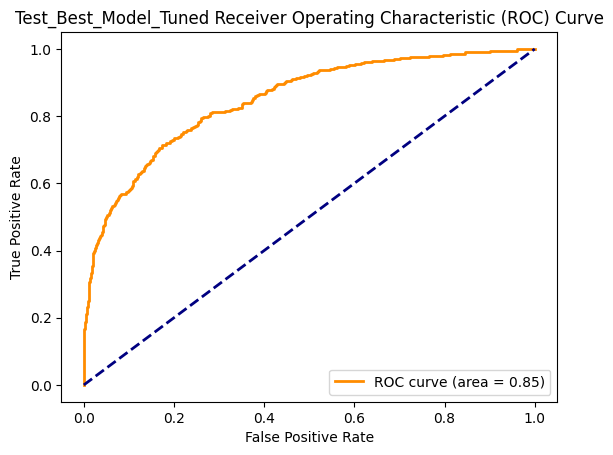

cm2 [[1142  450]
 [ 293  115]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.3749934732913971, 'cross entropy': 0.35247907042503357, 'MSE': 0.1078634262084961, 'TP': 169.0, 'TN': 1550.0, 'FP': 43.0, 'FN': 238.0, 'accuracy': 0.859499990940094, 'precision': 0.7971698045730591, 'recall': 0.41523340344429016, 'auc': 0.8498297929763794, 'prc': 0.6749235987663269, 'Model_Name': 'Test_Best_Model_Tuned'}


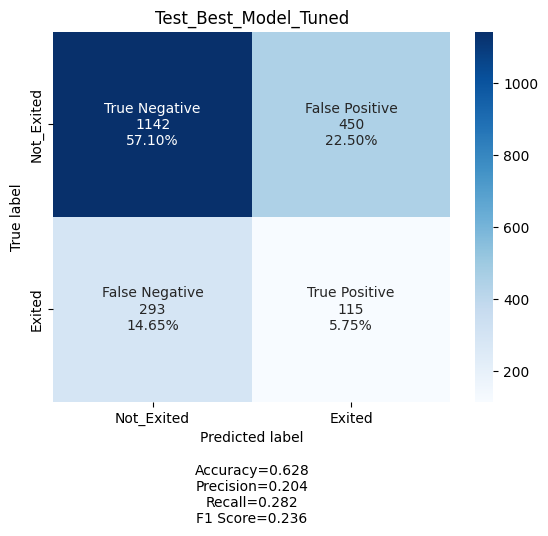

In [295]:
metrics = create_and_fit_best_model("Test_Best_Model_Tuned",
                                            random_hp_val_result,
                                            X_train.numpy(),
                                            y_train.numpy(),
                                            X_val.numpy(),
                                            y_val.numpy(),
                                            X_test.numpy(),
                                            y_test.numpy())


In [296]:
print(metrics)

{'loss': 0.3749934732913971, 'cross entropy': 0.35247907042503357, 'MSE': 0.1078634262084961, 'TP': 169.0, 'TN': 1550.0, 'FP': 43.0, 'FN': 238.0, 'accuracy': 0.859499990940094, 'precision': 0.7971698045730591, 'recall': 0.41523340344429016, 'auc': 0.8498297929763794, 'prc': 0.6749235987663269, 'Model_Name': 'Test_Best_Model_Tuned'}


In [297]:
df_metrics = pd.DataFrame(all_model_metrics)
df_metrics

,loss,cross entropy,MSE,TP,TN,FP,FN,accuracy,precision,recall,auc,prc,Model_Name
0,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila
1,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila
2,0.893569,0.893569,0.158138,173.0,1454.0,139.0,234.0,0.8135,0.554487,0.425061,0.754481,0.546723,Adam_Vanila
3,0.359747,0.359747,0.109627,201.0,1495.0,98.0,206.0,0.8480,0.672241,0.493858,0.841943,0.671017,Adam_WithDropOut
4,0.374993,0.352479,0.107863,169.0,1550.0,43.0,238.0,0.8595,0.797170,0.415233,0.849830,0.674924,Test_Best_Model_Tuned


### Model Improvement: Neural Network model with balanced data

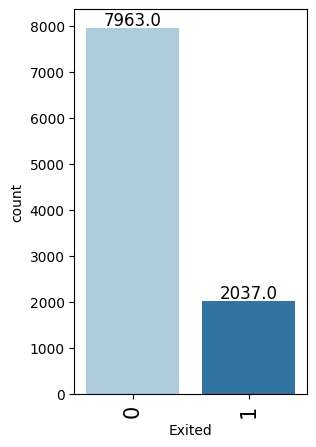

In [298]:
# data is imbalanced
labeled_barplot(df, "Exited", perc=False, n=None)

In [299]:
# Synthetic Minority Over Sampling Technique
# needs to be done before modeling
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_np = X_train.numpy()
y_train_np = y_train.numpy()
X_train_over, y_train_over = sm.fit_resample(X_train_np, y_train_np)

In [300]:
print(f"X_train_over: {X_train_over.shape}, y_train_over: {y_train_over.shape}")

X_train_over: (9556, 11), y_train_over: (9556,)


In [301]:
print(f"Original Class 1: {np.sum(X_train_np == 1):.2f} Class 0: {sum(y_train_np == 0):.2f}")
print(f"Original Shape X_Train : {X_train_np.shape[0]} y_train :{y_train_np.shape[0]}")
print(f"Over Sample Class 1: {sum(y_train_over == 1):.2f} Class 0: {sum(y_train_over == 0):.2f}")
print(f"Over Sample Shape X_Train : {X_train_over.shape[0]} y_train :{y_train_over.shape[0]} y_train/2 :{y_train_over.shape[0]/2} -> Same as Original Class 0 (Majority)")


Original Class 1: 16629.00 Class 0: 4778.00
Original Shape X_Train : 6000 y_train :6000
Over Sample Class 1: 4778.00 Class 0: 4778.00
Over Sample Shape X_Train : 9556 y_train :9556 y_train/2 :4778.0 -> Same as Original Class 0 (Majority)


Clearing Backend Session
optimizer_name: Adam
units: 192
add_drop_out: False
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.001
Model: "Test_Best_Model_Over_Sampling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 192)               2304      
                                                                 
 HiddenDense0 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense1 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense2 (Dense)        (None, 192)               37056     
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 193       
                                                            

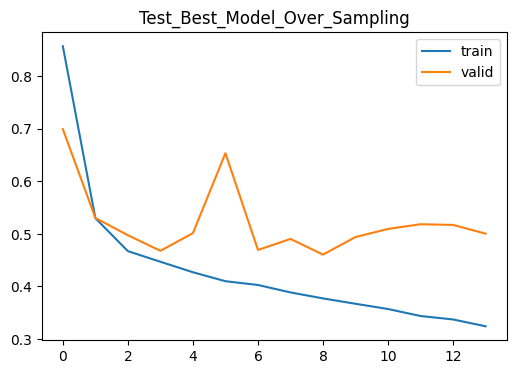

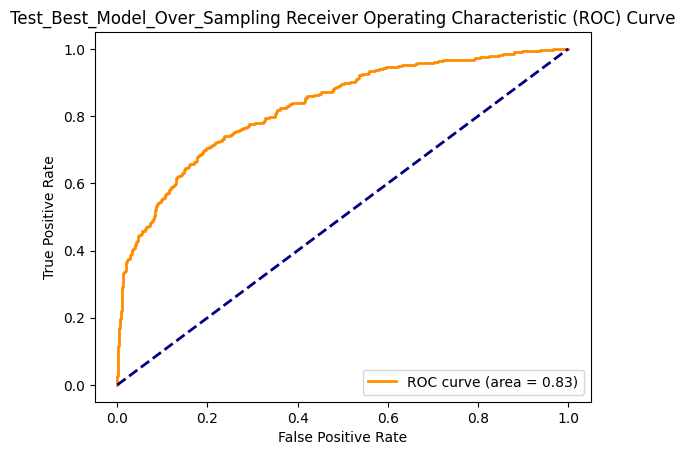

cm2 [[1116  476]
 [ 283  125]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.4621109366416931, 'cross entropy': 0.4297546446323395, 'MSE': 0.1361657977104187, 'TP': 263.0, 'TN': 1349.0, 'FP': 244.0, 'FN': 144.0, 'accuracy': 0.8059999942779541, 'precision': 0.5187376737594604, 'recall': 0.6461916565895081, 'auc': 0.8285071849822998, 'prc': 0.6341326832771301, 'Model_Name': 'Test_Best_Model_Over_Sampling'}


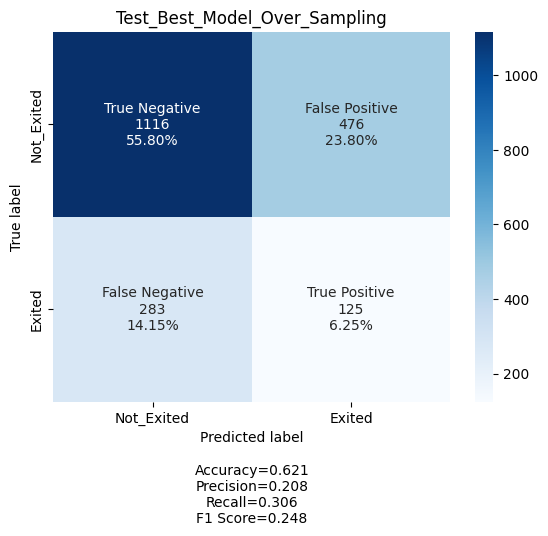

In [302]:
metrics = create_and_fit_best_model("Test_Best_Model_Over_Sampling",
                                            random_hp_val_result,
                                            X_train_over,
                                            y_train_over,
                                            X_val.numpy(),
                                            y_val.numpy(),
                                            X_test.numpy(),
                                            y_test.numpy())


In [303]:
# Random undersampler for under sampling the data
# needs to be done before modeling
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train_np, y_train_np)

In [304]:
print(f"X_train_un: {X_train_un.shape}, y_train_un: {y_train_un.shape}")

X_train_un: (2444, 11), y_train_un: (2444,)


In [305]:
print(f"Original Class 1: {np.sum(y_train_np == 1):.2f} Class 0: {sum(y_train_np == 0):.2f}")
print(f"Original Shape X_Train : {X_train_np.shape[0]} y_train :{y_train_np.shape[0]}")
print(f"Under Sample Class 1: {sum(y_train_un == 1):.2f} Class 0: {sum(y_train_un == 0):.2f}")
print(f"Under Sample Shape X_Train : {X_train_un.shape[0]} y_train :{X_train_un.shape[0]} y_train/2 :{X_train_un.shape[0]/2} -> Same as Original Class 1 (Minority)")

Original Class 1: 1222.00 Class 0: 4778.00
Original Shape X_Train : 6000 y_train :6000
Under Sample Class 1: 1222.00 Class 0: 1222.00
Under Sample Shape X_Train : 2444 y_train :2444 y_train/2 :1222.0 -> Same as Original Class 1 (Minority)


Clearing Backend Session
optimizer_name: Adam
units: 192
add_drop_out: False
dropout_rate: 0.3
batch_norm: False
number_of_hidden_layer: 3
learning_rate: 0.001
l2_rate: 0.001
Model: "Test_Best_Model_Under_Sampling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 192)               2304      
                                                                 
 HiddenDense0 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense1 (Dense)        (None, 192)               37056     
                                                                 
 HiddenDense2 (Dense)        (None, 192)               37056     
                                                                 
 OutputSigmoid (Dense)       (None, 1)                 193       
                                                           

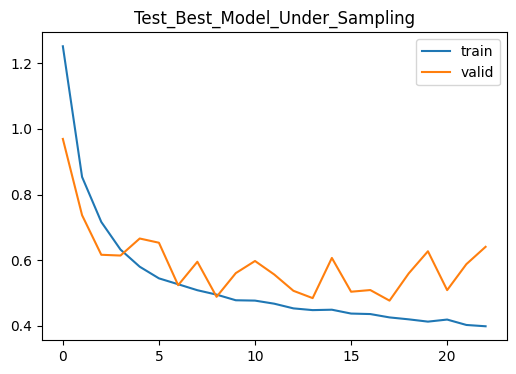

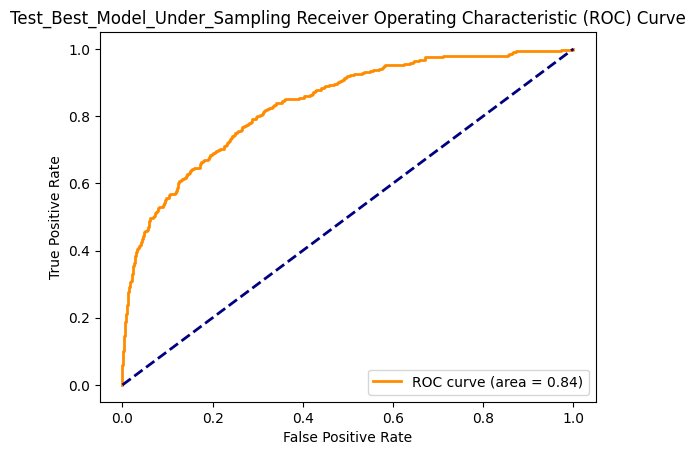

cm2 [[951 641]
 [250 158]]
metrics_col 12: ['loss', 'cross entropy', 'MSE', 'TP', 'TN', 'FP', 'FN', 'accuracy', 'precision', 'recall', 'auc', 'prc']
len(metrics_values): 12
model_eval after zip{'loss': 0.46942389011383057, 'cross entropy': 0.4302886128425598, 'MSE': 0.13729022443294525, 'TP': 265.0, 'TN': 1318.0, 'FP': 275.0, 'FN': 142.0, 'accuracy': 0.7914999723434448, 'precision': 0.49074074625968933, 'recall': 0.6511056423187256, 'auc': 0.836583137512207, 'prc': 0.634967029094696, 'Model_Name': 'Test_Best_Model_Under_Sampling'}


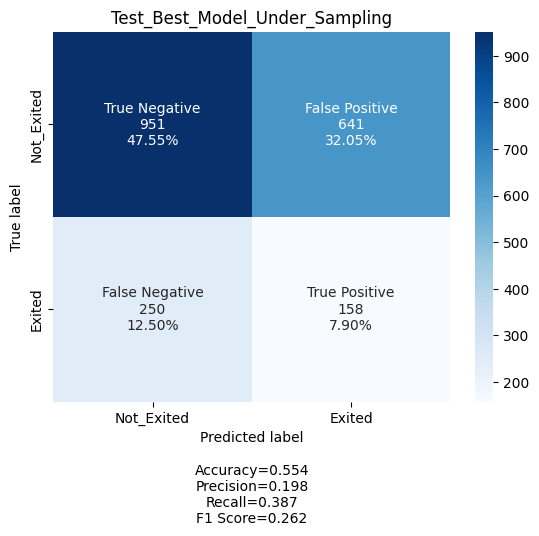

In [306]:
metrics = create_and_fit_best_model("Test_Best_Model_Under_Sampling",
                                            random_hp_val_result,
                                            X_train_un,
                                            y_train_un,
                                            X_val.numpy(),
                                            y_val.numpy(),
                                            X_test.numpy(),
                                            y_test.numpy())


## Final Model

<span style="color:blue">
<h3>Best Model<h3>
<ul>
</ul>
</span>

<span style="color:blue">
<h3>Best Tuned model<h3>
<ul>
<li>The following are hyper parameters for best tuned model</li>
</ul>


In [307]:
print("-----------Best Model :Test_Best_Model_Tuned -----------")
print(f"optimizer_name: {random_hp_val_result.best_params_['optimizer_name']}")
print(f"units: {random_hp_val_result.best_params_['units']}")
print(f"number_of_hidden_layer: {random_hp_val_result.best_params_['number_of_hidden_layer']}")
print(f"learning_rate: {random_hp_val_result.best_params_['learning_rate']}")
print(f"add_drop_out: {random_hp_val_result.best_params_['add_drop_out']}")
print(f"dropout_rate: {random_hp_val_result.best_params_['dropout_rate']}")
print(f"batch_norm: {random_hp_val_result.best_params_['batch_norm']}")
print(f"l2_rate: {random_hp_val_result.best_params_['l2_rate']}")
print(f"Early Stoping {early_stoping}")

-----------Best Model :Test_Best_Model_Tuned -----------
optimizer_name: Adam
units: 192
number_of_hidden_layer: 3
learning_rate: 0.001
add_drop_out: False
dropout_rate: 0.3
batch_norm: False
l2_rate: 0.001
Early Stoping True


## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

In [308]:
df_metrics = pd.DataFrame(all_model_metrics)
df_metrics_recall_sorted = df_metrics.sort_values(by='recall', ascending=False)
df_metrics_recall_sorted

,loss,cross entropy,MSE,TP,TN,FP,FN,accuracy,precision,recall,auc,prc,Model_Name
6,0.469424,0.430289,0.137290,265.0,1318.0,275.0,142.0,0.7915,0.490741,0.651106,0.836583,0.634967,Test_Best_Model_Under_Sampling
5,0.462111,0.429755,0.136166,263.0,1349.0,244.0,144.0,0.8060,0.518738,0.646192,0.828507,0.634133,Test_Best_Model_Over_Sampling
3,0.359747,0.359747,0.109627,201.0,1495.0,98.0,206.0,0.8480,0.672241,0.493858,0.841943,0.671017,Adam_WithDropOut
2,0.893569,0.893569,0.158138,173.0,1454.0,139.0,234.0,0.8135,0.554487,0.425061,0.754481,0.546723,Adam_Vanila
4,0.374993,0.352479,0.107863,169.0,1550.0,43.0,238.0,0.8595,0.797170,0.415233,0.849830,0.674924,Test_Best_Model_Tuned
0,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila
1,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila


In [309]:
df_metrics = pd.DataFrame(all_model_metrics)
df_metrics_accuracy_sorted = df_metrics.sort_values(by='accuracy', ascending=False)
df_metrics_accuracy_sorted

,loss,cross entropy,MSE,TP,TN,FP,FN,accuracy,precision,recall,auc,prc,Model_Name
4,0.374993,0.352479,0.107863,169.0,1550.0,43.0,238.0,0.8595,0.797170,0.415233,0.849830,0.674924,Test_Best_Model_Tuned
3,0.359747,0.359747,0.109627,201.0,1495.0,98.0,206.0,0.8480,0.672241,0.493858,0.841943,0.671017,Adam_WithDropOut
0,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila
1,0.378304,0.378304,0.116363,144.0,1542.0,51.0,263.0,0.8430,0.738462,0.353808,0.824282,0.624339,SCG_Vanila
2,0.893569,0.893569,0.158138,173.0,1454.0,139.0,234.0,0.8135,0.554487,0.425061,0.754481,0.546723,Adam_Vanila
5,0.462111,0.429755,0.136166,263.0,1349.0,244.0,144.0,0.8060,0.518738,0.646192,0.828507,0.634133,Test_Best_Model_Over_Sampling
6,0.469424,0.430289,0.137290,265.0,1318.0,275.0,142.0,0.7915,0.490741,0.651106,0.836583,0.634967,Test_Best_Model_Under_Sampling


<span style="color:blue">
<h3>General Recommendations<h3>
<ul>
<li>Provide incentives to younger customer to use more of bank services, it is possible they do not know all services at the bank, advertizing to this demographics will help reduce attrition</li>
<li>Customer not using servies is a theme across all customers, providing incentives to use services will help the bank retain more customers</li>
<li>Target a advertizing compaign, for younger, females and Germans to prevent attrition</li>
<li>Customers with high balance do not see ROI with the bank, perhaps the bank should suggest higher interest bearing accounts</li>
</ul>
</span>
<span style="color:blue">
<h3>Model Recommendations<h3>
<ul>
<li>Over Sampling and Under Sampling were tried due to imbalanced data but did not perform well with Accuracy as metric but Test_Best_Model_Under_Sampling has highest recall score of 	0.651106</li>
<li>Looking at the above table, we can select Test_Best_Model_Tuned using accuracy as metric, this model does not have over or under stampling, or any dropout or batch norm, but does have l2 Regularization with Early Stopping, and it has highlest accuracy score of 0.85</li>
<li>Since there is imbalanced data we will choose recall as the metrics as there is a danger of using accuracy as it could just choose majority of class</li>
<li>Overall we recommend Test_Best_Model_Under_Sampling as it has best Recall score and high AUC score as well</li>
</ul>
</span>